In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
mat = scipy.io.loadmat('04HW2_noisy.mat')

In [23]:
mat=mat["X"]

In [24]:
u,s,vh=np.linalg.svd(mat)

In [25]:
print(mat.shape,u.shape,s.shape,vh.shape)

(560, 1965) (560, 560) (560,) (1965, 1965)


In [26]:
def denoise(data,pc_take): # get the denoised dataframe
    u,s,vh=np.linalg.svd(data)
    
    u_reduce=u[:,0:pc_take] # take first 10 col
    s_reduce=np.diag(s[0:pc_take].tolist()) # take first 10pc
    vh_reduce=vh[0:pc_take,:]
    
    data_reduce=np.matmul(np.matmul(u_reduce,s_reduce),vh_reduce)
    return(data_reduce)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
def pic_draw(data,img_ordor):
    data=data[:,img_ordor-1].reshape(28,20)
    return(data)

# a. 

In [29]:
denoise_data=denoise(mat,10)
pics=[pic_draw(denoise_data,10),pic_draw(denoise_data,121),pic_draw(denoise_data,225),pic_draw(denoise_data,318),
     pic_draw(denoise_data,426)]

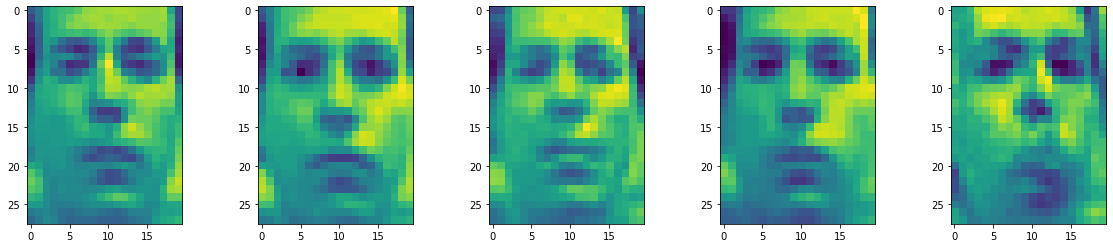

In [30]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(pics[i])

# b. 

# 2 dimension¶


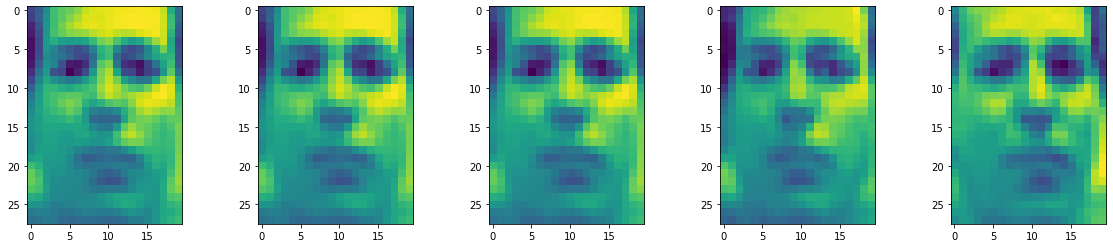

In [31]:
denoise_data=denoise(mat,2)
pics=[pic_draw(denoise_data,10),pic_draw(denoise_data,121),pic_draw(denoise_data,225),pic_draw(denoise_data,318),
     pic_draw(denoise_data,426)]

plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(pics[i])

# 30 dimension¶


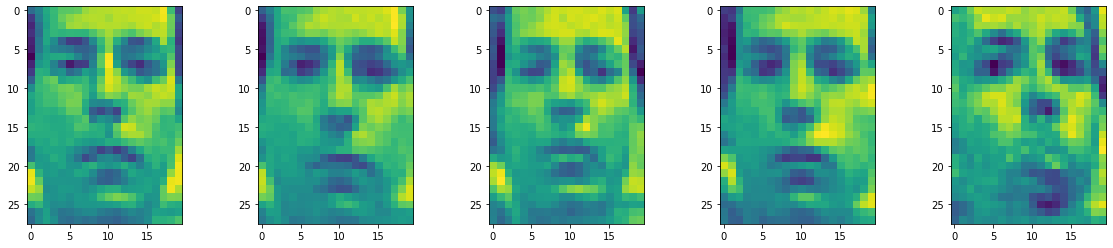

In [32]:
denoise_data=denoise(mat,30)
pics=[pic_draw(denoise_data,10),pic_draw(denoise_data,121),pic_draw(denoise_data,225),pic_draw(denoise_data,318),
     pic_draw(denoise_data,426)]

plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(pics[i])

# c. draw scree plot¶


SVD:

In [35]:
s_=s.tolist()
s=s/np.sum(s)
cum_var=[s[0]]
for i in range(len(s)-1):
    cum_var.append((cum_var[i]+s[i+1])/np.sum(s))

In [36]:
var_left=1-np.array(cum_var)


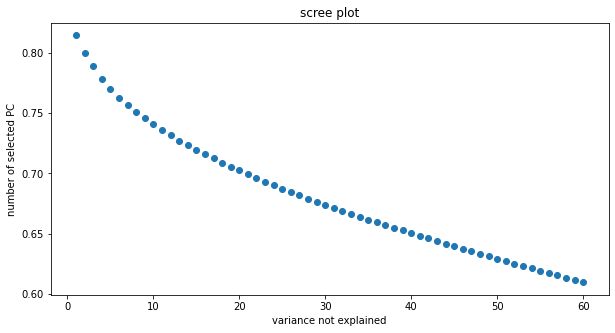

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(np.arange(1,60+1,1),var_left[0:60])
plt.xlabel("variance not explained")
plt.ylabel("number of selected PC")
plt.title("scree plot")
plt.rcParams.update({'font.size': 20})

Eigenvalue & eigenvector decomposition

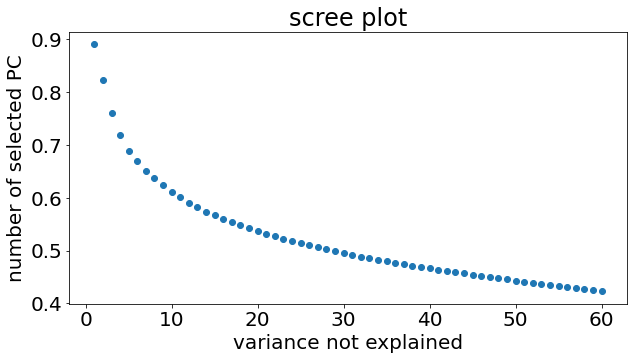

In [38]:
s=np.cov(mat)
s=np.linalg.eig(s)[0]
s=s.tolist()
s=s/np.sum(s)
cum_var=[s[0]]
for i in range(len(s)-1):
    cum_var.append((cum_var[i]+s[i+1])/np.sum(s))
var_left=1-np.array(cum_var)
plt.figure(figsize=(10,5))
plt.scatter(np.arange(1,60+1,1),var_left[0:60])
plt.xlabel("variance not explained")
plt.ylabel("number of selected PC")
plt.title("scree plot")
plt.rcParams.update({'font.size': 20})

從兩種分解方式的scree plot得知，當選擇10個PC左右時，能解釋的變異都解釋得差不多，剩下的為噪音